# ***Simulating 2D Ising Model using Metropolis algorithm***

## *importing the modules and packages, Configuration of the Figs and Data directories*

In [9]:
using Plots, ProgressMeter, JLD

include("Q1-Ising2D.jl")

figpath = "../../Figs/Q1/"
datapath = "../../Data/Q1/"
Plots.default(titlefontsize = 12, tickfontsize = 10, labelfontsize = 12,
    fontfamily = "Computer Modern", frame = :box, label = nothing)

In [13]:
βList₁ = hcat(0.0:0.02:0.333)
Data₁ = zeros(4, 17)

PRG = Progress(17)
for i ∈ 1:17
    β = βList₁[i]
    Data₁[:, i] = [Ising2D.IsingModel(β;)...]
    next!(PRG)
end
save(datapath * "1stDataSet.jld", "1stDataSet", Data₁)

Progress: 100%|█████████████████████████████████████████| Time: 2:56:24


In [23]:
βList₂ = hcat(0.333:0.001:0.466)
Data₂ = zeros(4, 134)

PRG = Progress(134)
for i ∈ 1:134
    β = βList₂[i]
    Data₂[:, i] = [Ising2D.IsingModel(β;)...]
    next!(PRG)
end
save(datapath * "2ndDataSet.jld", "2ndDataSet", Data₂)

Progress: 100%|█████████████████████████████████████████| Time: 2:45:35


In [ ]:
βList₃ = hcat(0.48:0.02:1.0)
Data₃ = zeros(4, 27)

PRG = Progress(27)
for i ∈ 1:27
    β = βList₃[i]
    Data₃[:, i] = [Ising2D.IsingModel(β;)...]
    next!(PRG)
end
save(datapath * "3rdDataSet.jld", "3rdDataSet", Data₃)

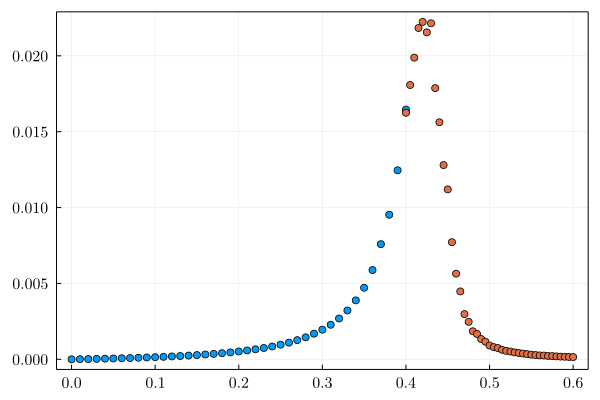

In [32]:
scatter(βList₁, Data₁[4, :])
scatter!(βList₂, Data₂[4, :])